# ASSIGNMENT 4

# PROBLEM 2 PART 1

In [21]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots

# Data Loading
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)
np.random.seed(0)

print('Minimum:', np.min(X,axis=0))
print("\n")
print('Maximum: ', np.max(X,axis=0))
print("\n")
print('Mean:', np.mean(X,axis=0))
print("\n")
print('Variance: ', np.var(X,axis=0))
print("\n")

Minimum: [ 1.9300e+02  1.9000e+02  2.1497e+02  2.0542e+02  1.0000e+01  0.0000e+00
  0.0000e+00  0.0000e+00  6.8146e-01  0.0000e+00  0.0000e+00  0.0000e+00
  1.0074e+00 -9.9990e+02]


Maximum:  [2.5300e+02 2.5050e+02 2.5250e+02 2.5250e+02 1.7130e+04 1.2338e+04
 9.2380e+03 3.5796e+01 1.9899e+01 1.1368e+01 2.1466e+01 1.4745e+01
 2.7871e+02 7.8250e+02]


Mean: [2.41797220e+02 2.28228260e+02 2.41796298e+02 2.33649299e+02
 2.86797959e+03 8.84073295e+02 1.73553355e+02 3.04719572e+00
 6.35196722e+00 1.92523232e+00 4.29379349e+00 2.80947178e+00
 1.03679146e+01 7.87334450e+00]


Variance:  [8.26945619e+01 9.09573945e+01 3.57255796e+01 9.52608539e+01
 1.06194180e+07 3.25702985e+06 7.40656134e+05 7.42244277e+00
 6.33229913e+00 4.28448703e+00 4.04684087e+00 1.98218303e+00
 1.66679252e+02 1.41079679e+03]




# PROBLEM 2 PART 2

In [22]:
Xtr, Xva, Ytr, Yva = ml.splitData(X, Y)
Xt, Yt = Xtr[:5000], Ytr[:5000] # subsample for efficiency (you can go higher)
XtS, params = ml.rescale(Xt) # Normalize the features
XvS, _ = ml.rescale(Xva, params) # Normalize the features

print('Training Data \n')
print('Minimum:', np.min(XtS,axis=0))
print("\n")
print('Maximum: ', np.max(XtS,axis=0))
print("\n")
print('Mean:', np.mean(XtS,axis=0))
print("\n")
print('Variance: ', np.var(XtS,axis=0))
print("\n")



print('Validation Data \n')
print('Minimum:', np.min(XvS,axis=0))
print("\n")
print('Maximum: ', np.max(XvS,axis=0))
print("\n")
print('Mean:', np.mean(XvS,axis=0))
print("\n")
print('Variance: ', np.var(XvS,axis=0))
print("\n")

Training Data 

Minimum: [ -4.81893905  -4.04780173  -4.47015932  -2.9213702   -0.87150265
  -0.49225389  -0.19471328  -1.12285853  -1.92665196  -0.9423497
  -2.09754856  -1.95726985  -0.69203519 -25.53685721]


Maximum:  [ 1.24091346  1.77305648  1.63838283  1.84967794  4.34316742  6.31986897
 10.22121026  9.62830823  4.74963165  4.60019484  6.73135223  5.40671787
 14.41438767 10.64859379]


Mean: [ 8.53483950e-15 -2.51541010e-15  7.04849179e-14  1.23394905e-14
  2.50910404e-18  3.49298368e-16  1.10483844e-15 -1.18063337e-15
 -1.40715217e-16  1.08979492e-15 -1.72506454e-16  5.85209659e-16
 -2.57121546e-15 -2.87891933e-16]


Variance:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Validation Data 

Minimum: [ -5.14947646  -4.04780173  -4.52579881  -2.9213702   -0.87150265
  -0.49225389  -0.19471328  -1.12285853  -2.0052829   -0.9423497
  -2.09754856  -1.95726985  -0.69621818 -25.53685721]


Maximum:  [ 1.24091346  2.09055784  1.74460368  1.91486467  4.34316742  6.31986897
 10.22121026 

# PROBLEM 3 PART 1

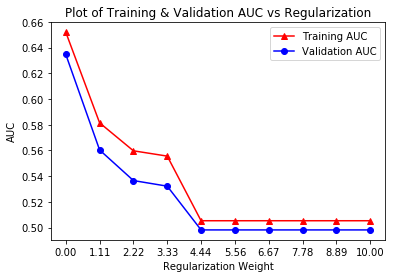

Training AUC: [0.6519363996150299, 0.5814763421203416, 0.5597342459452823, 0.5556088164849063, 0.505353330670381, 0.505353330670381, 0.505353330670381, 0.505353330670381, 0.505353330670381, 0.505353330670381]
Validation AUC: [0.6346701375713852, 0.5603762873033624, 0.5365919964992336, 0.5322304077105076, 0.49821174287267456, 0.49821174287267456, 0.49821174287267456, 0.49821174287267456, 0.49821174287267456, 0.49821174287267456]


In [23]:
Reg = np.linspace( 0, 10, 10 )

Auc_Training = []
Auc_Validation = []

for i, reg in enumerate(Reg):
    learner = ml.linearC.linearClassify()
    learner.train(XtS, Yt, reg=reg, 
                  initStep=0.5, stopTol=1e-6, stopIter=100)
    Auc_Training.append(learner.auc(XtS, Yt))
    Auc_Validation.append(learner.auc(XvS, Yva)) 

plt.plot(Reg, Auc_Training, marker='^', 
         color = "red", label = "Training AUC")
plt.plot(Reg, Auc_Validation, marker='o', 
         color = "blue", label = "Validation AUC")

plt.xticks(Reg)
plt.xlabel("Regularization Weight")
plt.ylabel("AUC")
plt.title("Plot of Training & Validation AUC vs Regularization")
plt.legend()
plt.show()

print('Training AUC:',Auc_Training)
print('Validation AUC:', Auc_Validation)

# PROBLEM 3 PART 2

In [24]:
print("Before Using Ploynomial of Degree 2: "+str(XtS.shape))


def Phi(Xtr, Xte):
    XtrP = ml.transforms.fpoly(Xtr, degree, bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    XteP,_ = ml.transforms.rescale(\
    ml.transforms.fpoly(Xte,degree,False), params)
    
    return XtrP, XteP

degree = 2
XtP = Phi(Xt, Xva)[0]
XvaP = Phi(Xt, Xva)[1]

print("After Using Ploynomial of Degree 2: " + str(XtP.shape[1]))


Before Using Ploynomial of Degree 2: (5000, 14)
After Using Ploynomial of Degree 2: 119


Initial Features: 14. 
Number of Features: 119.
The number of features is 119, because there are 14 original features, 14 degree 2 features, and $14*13/2$ combinations of any two of the 14 features: 14+14+14*13/2 = 119.

# PROBLEM 3 PART 3

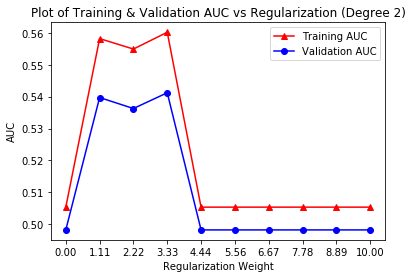

Training AUC: [0.505353330670381, 0.5582046018459784, 0.5549222899785603, 0.5601946983071046, 0.505353330670381, 0.505353330670381, 0.505353330670381, 0.505353330670381, 0.505353330670381, 0.505353330670381]
Validation AUC: [0.49821174287267456, 0.5397268055856367, 0.5362762640811444, 0.5412191494639694, 0.49821174287267456, 0.49821174287267456, 0.49821174287267456, 0.49821174287267456, 0.49821174287267456, 0.49821174287267456]


In [ ]:
Reg = np.linspace( 0, 10, 10 )

Auc_Training = []
Auc_Validation = []

for i, reg in enumerate(Reg):
    learner = ml.linearC.linearClassify()
    learner.train(XtP, Yt, reg=reg, 
                  initStep=0.5, stopTol=1e-6, stopIter=100)
    Auc_Training.append(learner.auc(XtP, Yt))
    Auc_Validation.append(learner.auc(XvaP, Yva)) 

plt.plot(Reg, Auc_Training, marker='^', 
         color = "red", label = "Training AUC")
plt.plot(Reg, Auc_Validation, marker='o', 
         color = "blue", label = "Validation AUC")

plt.xticks(Reg)
plt.xlabel("Regularization Weight")
plt.ylabel("AUC")
plt.title("Plot of Training & Validation AUC vs Regularization (Degree 2)")
plt.legend()
plt.show()

print('Training AUC:',Auc_Training)
print('Validation AUC:', Auc_Validation)

# PROBLEM 4 PART 1

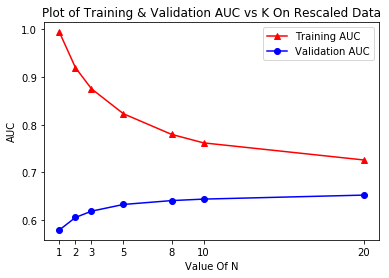

Training AUC: [0.993583239601818, 0.919534551636843, 0.8752382548635176, 0.8228991246659941, 0.7798095452435542, 0.7620117989011169, 0.7262239567754369]
Validation AUC: [0.5798074240417755, 0.6058440261874822, 0.6190336852462311, 0.6331132777819344, 0.6411755162422403, 0.6443030893946909, 0.6526844986917013]


In [ ]:
N = np.array([1,2,3,5,8,10,20])
Auc_Training = []
Auc_Validation = []
learner = ml.knn.knnClassify()

for index, k in enumerate(N):
    learner.train(XtS, Yt, K=k, alpha=0.0)
    Auc_Training.append(learner.auc(XtS, Yt))
    Auc_Validation.append(learner.auc(XvS, Yva))
    
plt.plot(N, Auc_Training, marker='^', 
         color = "red", label = "Training AUC")
plt.plot(N, Auc_Validation, marker='o', 
         color = "blue", label = "Validation AUC")

plt.xticks(N)
plt.xlabel("Value Of N")
plt.ylabel("AUC")
plt.title("Plot of Training & Validation AUC vs K On Rescaled Data")
plt.legend()
plt.show()

print('Training AUC:',Auc_Training)
print('Validation AUC:', Auc_Validation)
    

# PROBLEM 4 PART 2

In [ ]:
N = np.array([1,2,3,5,8,10,20])
Auc_Training = []
Auc_Validation = []
learner = ml.knn.knnClassify()

for index, k in enumerate(N):
    learner.train(Xt, Yt, K=k, alpha=0.0)
    Auc_Training.append(learner.auc(Xt, Yt))
    Auc_Validation.append(learner.auc(Xva, Yva))
    
plt.plot(N, Auc_Training, marker='^', 
         color = "red", label = "Training AUC")
plt.plot(N, Auc_Validation, marker='o', 
         color = "blue", label = "Validation AUC")

plt.xticks(N)
plt.xlabel("Value Of N")
plt.ylabel("AUC")
plt.title("Plot of Training & Validation AUC vs K On Original Data")
plt.legend()
plt.show()

print('Training AUC:',Auc_Training)
print('Validation AUC:', Auc_Validation)
    

# PROBLEM 4 PART 3

In [ ]:
K = range(1,25,5)
A = range(0,5,1) 
Auc_Training = np.zeros((len(K),len(A)))
Auc_Validation = np.zeros((len(K),len(A)))
learner = ml.knn.knnClassify()

for i,k in enumerate(K):
    for j,a in enumerate(A):
        learner.train(Xt, Yt, K=k, alpha=a)
        Auc_Training[i][j] = learner.auc(Xt, Yt) 
        Auc_Validation[i][j] = learner.auc(Xva, Yva)

# Now plot it
figure, axis = plt.subplots(1, 1, figsize=(10, 8))

cax1 = axis.matshow(Auc_Training, interpolation='nearest')
figure.colorbar(cax1)
axis.set_xticklabels(['']+list(K))
axis.set_yticklabels(['']+list(A))
axis.set_xlabel("Value of K")
axis.set_ylabel("Value of A")
axis.set_title("Training AUC for Unscaled Data")

plt.show()

print('Training AUC:',Auc_Training)

In [ ]:
# Now plot it
figure, axis = plt.subplots(1, 1, figsize=(10, 8))

cax1 = axis.matshow(Auc_Validation, interpolation='nearest')
figure.colorbar(cax1)
axis.set_xticklabels(['']+list(K))
axis.set_yticklabels(['']+list(A))
axis.set_xlabel("Value of K")
axis.set_ylabel("Value of A")
axis.set_title("Validation AUC for Unscaled Data")

plt.show()

print('Validation AUC:',Auc_Validation)


In [ ]:
# ans to problem 4 part 3 here

# PROBLEM 5 PART 1

In [ ]:
maxd = np.array(range(1,30,3))
Auc_Training = np.zeros(maxd.shape[0])
Auc_Validation = np.zeros(maxd.shape[0])

learner = ml.dtree.treeClassify()
for i in range(1,30,3): 
    learner.train(XtS, Yt, maxDepth = i, minParent = 2, minLeaf= 1)
    auc_tr[i] = learner.auc(XtS, Yt)
    auc_va[i] = learner.auc(XvS, Yva)
    
plt.plot(maxd, auc_tr, marker='^', 
         color = "lightgreen", label = "Training AUC")
plt.plot(maxd, auc_va, marker='o', 
         color = "darkorange", label = "Validation AUC")
plt.xticks(maxd)
plt.xlabel("maxDepth")
plt.ylabel("AUC")
plt.title("Plot of Training & Validation AUC vs. maxDepth")
plt.legend()
plt.show()

print 'Train AUC:', auc_tr
print 'Validation AUC:', auc_va